<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [94]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [96]:
df = pd.read_csv(sac_csv)

In [97]:
#looking at all the columns
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [98]:
#checking the number of rows & columns
df.shape

(985, 12)

In [99]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [100]:
#checking data types
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [101]:
#checking for missing values
df.isnull().sum() 

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [102]:
#since price can't be negative, I'm finding the number of cells where price is a negative value
df.where(df.price < 0).price.value_counts()

-210944.0    1
Name: price, dtype: int64

In [103]:
df[df.price < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [104]:
df[df.sq__ft < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [105]:
df[df.state != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [106]:
#4 issues with row 703:
#state is AC instead of CA 
#sq ft negative instead of positive
#price negative instead of positive
#latitute and longitudes are swapped 
#assuming the above are typos, I'm fixing them using the below 

#converting negative price and sq ft to absolute values
df.price = df.price.abs()
df.sq__ft = df.sq__ft.abs()


#replacing AC with CA for state
first_mask = df.state.isin(['AC'])
df.loc[first_mask, 'state'] = "CA"


#swapping lat/long values
df.loc[703, 'latitude'] = 38.668433
df.loc[703, 'longitude'] = -121.503471


In [107]:
#checking if all cities are sacramento
df[df.city != 'SACRAMENTO'].count()

street       546
city         546
zip          546
state        546
beds         546
baths        546
sq__ft       546
type         546
sale_date    546
price        546
latitude     546
longitude    546
dtype: int64

In [108]:
#dropping rows with cities other than sacramento
df.drop(df.index[df['city'] != 'SACRAMENTO'], inplace = True)

In [109]:
df.shape

(439, 12)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

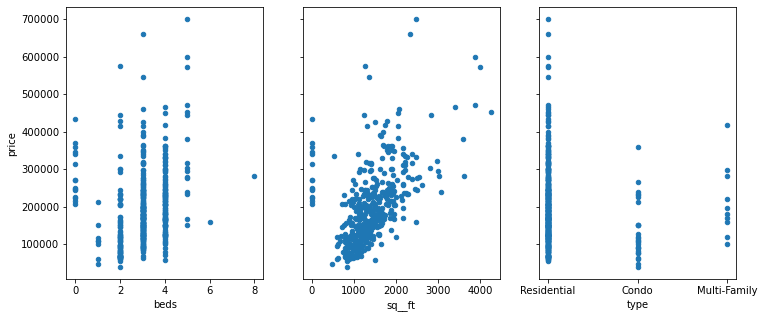

In [110]:
fig, axs = plt.subplots(1, 3, sharey=True)

df.plot(kind='scatter', x='beds', y='price', ax=axs[0], figsize=(12, 5));
df.plot(kind='scatter', x='sq__ft', y='price', ax=axs[1], figsize=(12, 5));
df.plot(kind='scatter', x='type', y='price', ax=axs[2], figsize=(12, 5));

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

Square feet because the values are continuous and not discrete.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [111]:
from sklearn.linear_model import LinearRegression

feature_cols = ['sq__ft']

# Creating X and y.
X = df[feature_cols]
y = df.price

# Instantiating and fitting
lr = LinearRegression()
lr.fit(X, y)

# Printing intercept and slope
print(lr.intercept_)
print(lr.coef_)

pd.DataFrame(list(zip(feature_cols, lr.coef_)), columns=['feature_name', 'coef'])


80686.10335446481
[83.95128027]


,feature_name,coef
0,sq__ft,83.95128


### 6. Interpret the intercept. Interpret the slope.

Intercept: The expected price when square feet (X) is 0 should be around 80,686 USD. 

Slope: The price increases by around $83 for every additional square feet. 

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Prediction: If we had a property on sale in Sacramento for X square feet, we could predict that the price of the property will be around (80686.10 + 83.95X). For example, if the square feet of a new property on sale is 33,350, the price will be around the following: 

In [112]:
lr.predict(np.array([[33350]]))

array([2880461.30034416])

Inference: From this model we can infer that as the square feet increases for a particular property on sale, the price is likely to go up. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

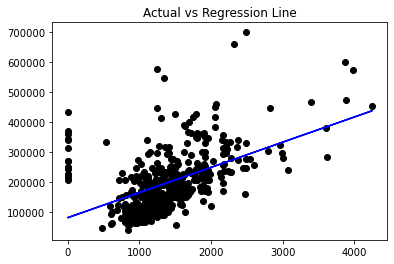

In [130]:
#checking how well the regression line 
y_pred = lr.predict(X)

plt.plot(X, y, 'o', color='black')
plt.plot(X, y_pred, color='blue')

plt.title("Actual vs Regression Line");

In [131]:
lr.score(X, y)

0.2500615618323109

Text(0, 0.5, 'Residual')

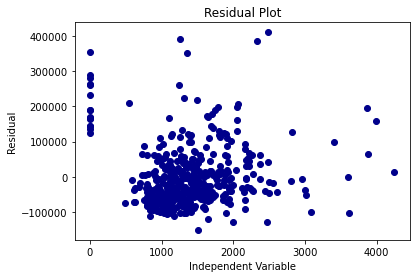

In [133]:
#determining residuals using y-y_pred and then plotting residuals

residuals = y - y_pred
plt.plot(X, residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")